In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [91]:
#Import Dataset
df = pd.read_csv("./Data/cleaned_data.csv", delimiter = '\t')
df

,Player,Tm,PTS,Age,G,GS,MP,FG,FGA,FG%,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
0,Precious Achiuwa,NYK,5.2,-0.635196,0.206292,-0.315059,0.032834,-0.265682,-0.331798,0.435515,...,-0.136166,-0.539862,1.715319,-0.366901,0.246799,-0.605531,-0.277504,1.987459,-0.591965,0.521759
1,Bam Adebayo,MIA,22.6,-0.195287,-0.526429,0.200930,1.376889,2.154425,2.038275,0.473375,...,1.154829,0.363192,1.496885,1.984685,1.998319,0.998600,-0.277504,-0.830641,0.663333,1.215277
2,Nickeil Alexander-Walker,MIN,7.3,-0.415242,1.488553,-0.487055,0.271777,-0.166225,0.025336,-0.224329,...,-0.505022,1.148218,-0.578238,-0.541093,-0.561594,0.246663,0.123752,0.036467,-0.068924,-0.085069
3,Grayson Allen,PHO,3.5,0.244623,-1.075970,-0.315059,0.114970,-0.862421,-0.705166,-1.122148,...,0.140475,1.148218,0.186281,0.155674,0.179433,-0.405015,-0.076876,-0.830641,0.558725,0.348380
4,Jarrett Allen,CLE,17.0,-0.415242,-0.709609,0.028934,0.884069,1.060404,0.398704,1.452323,...,2.215289,0.302805,3.244357,3.204025,3.480375,-0.254628,1.528145,1.337129,0.349509,0.348380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Jaylin Williams,OKC,4.4,-1.295060,0.389472,-0.659052,-0.542123,-0.497747,-0.575299,0.419289,...,-0.597236,0.462006,-0.469021,0.068578,-0.090031,-0.154370,-0.277504,-0.180310,-0.696573,-0.431829
210,Kenrich Williams,OKC,0.6,0.464577,-0.160069,-0.659052,-1.146948,-0.928725,-0.932433,-0.851721,...,-0.781664,-1.596628,-0.796672,-0.715284,-0.797376,-0.705790,-0.879387,-0.830641,-1.010398,-1.038657
211,Delon Wright,MIA,8.0,0.904487,-0.709609,-0.487055,0.510720,-0.033617,-0.299331,1.041273,...,-0.551129,1.148218,-0.359804,-0.062066,-0.157398,-0.003982,0.926262,-0.180310,-1.010398,-0.258449
212,Thaddeus Young,PHO,0.0,1.784306,-1.259150,-0.659052,-1.191750,-1.028181,-1.111000,-2.203859,...,-0.781664,-1.596628,-0.905889,-1.150763,-1.167890,-0.906306,-1.080014,-0.830641,-1.010398,-1.385416


### First, we will do a multi-feature linear regression model for the entire dataset

In [99]:
#Separating Features from Target
X = df.iloc[:, 3:]
y = df['PTS']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10271970)

#Fitting, Predicting, and Evaluating model
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
corr = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(f"r^2 value of model for all players: {corr}. MSE: {MSE}")

#Validation
cv = KFold(n_splits=5, shuffle=True, random_state=3)
scores = cross_val_score(reg, X_test, y_test, cv=cv, scoring='r2')
print(f"Cross-validation scores: {scores}")

r^2 value of model for all players: 0.9999196365482985. MSE: 0.0051267616115414655
Cross-validation scores: [0.99976324 0.99987726 0.99994676 0.99975576 0.99990871]


### Since the correlation and MSE are both excellent and backed by the validation results, we will now we will decide what the single most important feature is 
### First, we will check this by removing each feature individually, and seeing which feature reduces the r^2 the most. This will be done continually until there is only one feature remaining
### Then, we will individually do single-feature models to see check if the feature determined most important is truly the most important

In [104]:
#List of Features to iterate through
features = df.columns[3:].to_list()

#List to store the features in the order they were removed from the features list
removed = list()

#Loop until there is only one feature left
while (len(features) > 1):
    
    #feature to be removed in the next iteration of the outer loop, alongside other related data
    least_sig = None

    for feature in features:
        #Removing specified feature
        
        #Separating Features from Target
        X = df[features].drop(feature, axis=1)
        y = df['PTS']

        #Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10271970)

        #Fitting, Predicting, and Evaluating model
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        y_pred = reg.predict(X_test)
        corr = r2_score(y_test, y_pred)
        MSE = mean_squared_error(y_test, y_pred)
        
        #Validation
        cv = KFold(n_splits=5, shuffle=True, random_state=3)
        scores = cross_val_score(reg, X_test, y_test, cv=cv, scoring='r2')
        
        #Seeing if the current r^2 value is the highest value so far. This would indicate the removed feature of this iteration has had the least impact so far
        if least_sig is None or corr > least_sig.get("val"):
            least_sig = {"val": corr, "feature": feature, "MSE": MSE, "CV": scores}
    
    #Add least-important feature to removed list, and then remove the feature from the features list
    removed.append(least_sig.get("feature"))
    features.remove(least_sig.get("feature")) 
    print(f'r^2 value of model for all players when {removed} is removed: {least_sig.get("val")}. MSE = {least_sig.get("MSE")}')
    print(f'Cross-validation scores: {least_sig.get("CV")}\n')
    
print(f"Most Important Feature: {features}")

r^2 value of model for all players when ['FT%'] is removed: 0.9999217266116129. MSE = 0.0049934266671150815
Cross-validation scores: [0.99978678 0.9998779  0.99995083 0.99978902 0.99990852]

r^2 value of model for all players when ['FT%', 'AST'] is removed: 0.9999241139366678. MSE = 0.004841128001661051
Cross-validation scores: [0.99977562 0.99992469 0.9999483  0.99978493 0.99992333]

r^2 value of model for all players when ['FT%', 'AST', '2P%'] is removed: 0.9999251618284807. MSE = 0.004774278066701052
Cross-validation scores: [0.99979575 0.99992268 0.99993867 0.99978746 0.9999175 ]

r^2 value of model for all players when ['FT%', 'AST', '2P%', '3P%'] is removed: 0.9999261548856114. MSE = 0.004710926293377063
Cross-validation scores: [0.9997926  0.99993067 0.99993713 0.99979094 0.99992037]

r^2 value of model for all players when ['FT%', 'AST', '2P%', '3P%', 'TOV'] is removed: 0.9999268471488248. MSE = 0.004666763575221398
Cross-validation scores: [0.99979326 0.99993532 0.99993674 0.9

### The other features only had minimal contributions to the overall r^2 and the MSE never dropped too low, and FG (Field Goals) were deemed the most important. In the context of basketball, this answer makes sense, as the more goals you make, the more likely it is you have a higher pointed scored value. Now we will do single-feature models to validate this result

In [105]:
#List of Features to iterate through
features = df.columns[3:]
r2_vals = list()

for feature in features:
    #Removing specified feature
    
    #Separating Features from Target
    X = df[[feature]]
    y = df['PTS']

    #Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10271970)

    #Fitting, Predicting, and Evaluating model
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    corr = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    print(f"r^2 value of model for all players using {feature}: {corr}. MSE: {MSE}")
    
    #Validation
    cv = KFold(n_splits=5, shuffle=True, random_state=3)
    scores = cross_val_score(reg, X_test, y_test, cv=cv, scoring='r2')
    print(f"Cross-validation scores: {scores}\n")
    r2_vals.append(corr)

r^2 value of model for all players using Age: -0.019639997561442524. MSE: 65.04761911553
Cross-validation scores: [-0.15392258 -0.11075572  0.04094362  0.05918375  0.07688105]

r^2 value of model for all players using G: 0.062136382438372606. MSE: 59.83072017904601
Cross-validation scores: [-0.13417931  0.13803355  0.01803757  0.03021899 -0.03767654]

r^2 value of model for all players using GS: 0.33678236010405005. MSE: 42.30976475405758
Cross-validation scores: [0.3314829  0.55877637 0.27959093 0.11848562 0.12511207]

r^2 value of model for all players using MP: 0.772064448039282. MSE: 14.541078225930852
Cross-validation scores: [0.77288212 0.69686524 0.80168123 0.77193868 0.79814721]

r^2 value of model for all players using FG: 0.9712258472463557. MSE: 1.835638198940254
Cross-validation scores: [0.99182785 0.98568628 0.97535307 0.9309154  0.96382134]

r^2 value of model for all players using FGA: 0.9521935570853016. MSE: 3.0497972788638488
Cross-validation scores: [0.83642999 0.973

Text(0, 0.5, 'r^2 Value')

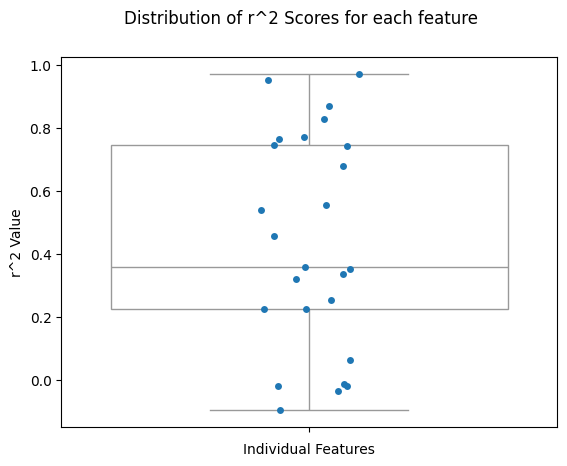

In [95]:
sns.stripplot(r2_vals)
sns.boxplot(r2_vals, color = 'white', showfliers = False)
plt.suptitle("Distribution of r^2 Scores for each feature")
plt.xlabel("Individual Features")
plt.ylabel("r^2 Value")

In [107]:
#Seeing how model performs without FG feature
X = df[features].drop('FG', axis=1)
y = df['PTS']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10271970)

#Fitting, Predicting, and Evaluating model
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
corr = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(f"r^2 value of model for all players using all features except FG: {corr}. MSE: {MSE}")

#Validation
cv = KFold(n_splits=5, shuffle=True, random_state=3)
scores = cross_val_score(reg, X_test, y_test, cv=cv, scoring='r2')
print(f"Cross-validation scores: {scores}")
r2_vals.append(corr)

r^2 value of model for all players using all features except FG: 0.999887981487916. MSE: 0.007146186423983287
Cross-validation scores: [0.99965898 0.99988415 0.99988457 0.999691   0.99984375]


### Single-feature Model results reinforce our previous finding that FG is the most significant feature. However, the other features are more than enough to predict the Points per game with good accuracy, meaning that while FG is the most significant feature, the model does not strictly rely on this speciic feature to predict properly

### Now, we will do the multi-feature linear regression per team, first with all features, then with only the most important feature

In [113]:
#Getting All Team Names to iterate through all of them
teams = np.unique(df['Tm'])

#Storing correlation values
r2_vals = list()

#Iterate through teams
for team in teams:
    #Splitting by team
    df_temp = df.loc[df['Tm'] == team]
    
    #Separating Features from Target
    X = df_temp.iloc[:, 3:]
    y = df_temp['PTS']
    
    #Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10271970)

    #Fitting, Predicting, and Evaluating model
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    corr = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    print(f"r^2 value of model for {team}: {corr}. MSE: {MSE}")
    
    r2_vals.append(corr)
    

r^2 value of model for BOS: 0.9597665416442093. MSE: 2.923620578265232
r^2 value of model for CLE: 0.8690050640291359. MSE: 11.864682932650656
r^2 value of model for DAL: 0.9821362296103844. MSE: 1.9769763235106033
r^2 value of model for DEN: 0.9658030806058475. MSE: 3.53382757758517
r^2 value of model for IND: 0.9125869404478063. MSE: 6.922904525190819
r^2 value of model for LAC: 0.7931604565261337. MSE: 4.098235978573798
r^2 value of model for LAL: 0.99674122252231. MSE: 0.4160807083514518
r^2 value of model for MIA: 0.875098839878709. MSE: 6.18604220790724
r^2 value of model for MIL: 0.9965700943751336. MSE: 0.4573930066606974
r^2 value of model for MIN: 0.8833733146660814. MSE: 2.2305553330223953
r^2 value of model for NOP: 0.7848877657183673. MSE: 3.850853173216076
r^2 value of model for NYK: 0.9573443403105614. MSE: 1.156923864360831
r^2 value of model for OKC: 0.9140944557980131. MSE: 3.0709513941326265
r^2 value of model for ORL: 0.9676244529330326. MSE: 2.86088464190082
r^2 va

Text(0, 0.5, 'r^2 Value')

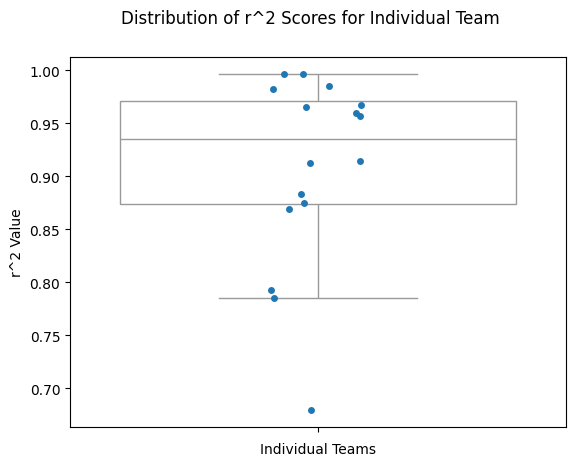

In [98]:
sns.stripplot(r2_vals)
sns.boxplot(r2_vals, color = 'white', showfliers = False)
plt.suptitle("Distribution of r^2 Scores for Individual Team")
plt.xlabel("Individual Teams")
plt.ylabel("r^2 Value")

### Only notable outlier in performance was the model for PHO, but the performance of ~68% is still fairly well. CLE had the highest MSE, but the value was still fairly low

In [ ]:
#Getting All Team Names to iterate through all of them
teams = np.unique(df['Tm'])

#Storing correlation values
r2_vals = list()

#Iterate through teams
for team in teams:
    #Splitting by team
    df_temp = df.loc[df['Tm'] == team]
    
    #Separating Features from Target
    X = df_temp[['FG']]
    y = df_temp['PTS']
    
    #Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10271970)

    #Fitting, Predicting, and Evaluating model
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    corr = r2_score(y_test, y_pred)
    print(f"r^2 value of model for {team}: {corr}. MSE: {mean_squared_error(y_test, y_pred)}")
    
    r2_vals.append(corr)

r^2 value of model for BOS: 0.976552289462214. MSE: 1.7038607130229786
Cross-validation scores: [ -8.62085553 -15.58041179]
r^2 value of model for CLE: 0.9600159297159819. MSE: 3.6215011882765418
Cross-validation scores: [0.99662035 0.99936496]
r^2 value of model for DAL: 0.9913828888216543. MSE: 0.9536522472630571
Cross-validation scores: [0.9380443  0.97111606]
r^2 value of model for DEN: 0.995652713201297. MSE: 0.44923818428964674
Cross-validation scores: [0.9226331  0.89744383]
r^2 value of model for IND: 0.9900562850475468. MSE: 0.7875183593184005
Cross-validation scores: [0.96146223 0.95887876]
r^2 value of model for LAC: 0.9772816225009492. MSE: 0.450132844415194
Cross-validation scores: [0.8303436  0.99529259]
r^2 value of model for LAL: 0.986218286078963. MSE: 1.7596492334380034
Cross-validation scores: [-0.29752066         nan]
r^2 value of model for MIA: 0.9490080225121607. MSE: 2.5255051650289655
Cross-validation scores: [0.94333089 0.73508784]
r^2 value of model for MIL: 0

C:\Users\kjeet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
